In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [61]:
df = pd.read_csv('d:\\Src\\health-des\\logs\\sim-res-2017-02-01-18-23-33.csv')
df.head()

,Unnamed: 0,TIME,QUEUE_LENGTH,STATE,PAT_CLASS,ID,DIRECTION,QUEUE_TIME
0,0,12,0,_01,2,0,IN,0
1,1,12,0,_01,2,0,OUT,0
2,2,12,0,A00,2,0,IN,0
3,3,41,0,A00,2,0,OUT,0
4,4,41,0,F04,2,0,IN,0


In [62]:
df = df[df.ID >= 0]
ids = list(df.ID.unique())
len(ids)

6679

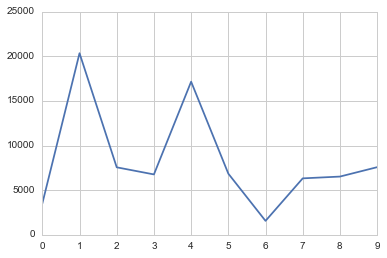

In [63]:
plt.plot(df.groupby('PAT_CLASS')['ID'].count())

In [25]:
obs = pd.read_csv('d:\\Src\\health-des\\data\\acs\\LoS for clusters.csv', sep=';')
obs.head()

,Cluster,Case,LoS
0,1,10004_S2015,17863.0
1,1,10145_S2010,21915.0
2,1,10266_S2011,23055.0
3,1,1083_S2015,11732.0
4,1,10983_S2014 11759_S2014,4773.0


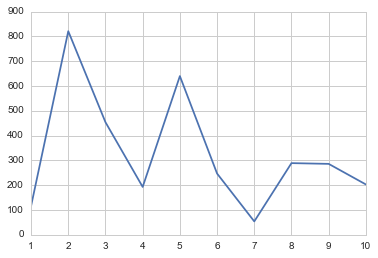

In [26]:
plt.plot(obs.groupby('Cluster')['Case'].count())

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(0, 100)

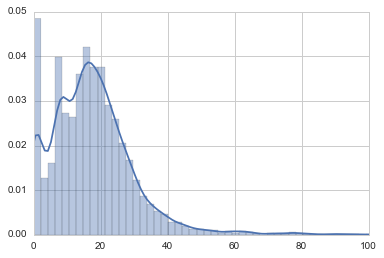

In [64]:
los = np.array(df.groupby('ID')['TIME'].max() - df.groupby('ID')['TIME'].min(), dtype=int)
los = los / (60.0 * 24.0)
sns.distplot(los)
plt.xlim((0,100))

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(0, 100)

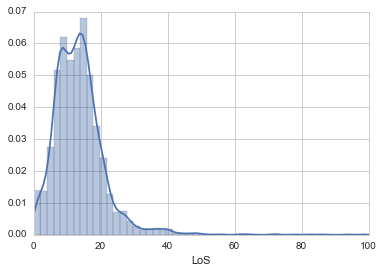

In [34]:
los_obs = obs.LoS / (60.0 * 24.0)
sns.distplot(los_obs[los_obs < 100])
plt.xlim((0,100))

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


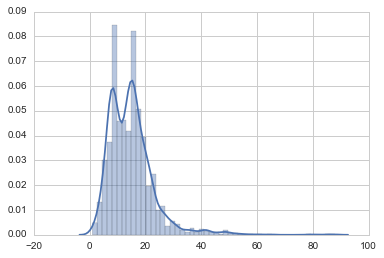

In [45]:
los_1 = np.loadtxt('d:\\Src\\health-des\\data\\acs\\los.txt').flatten()
los_1 = los_1[los_1 < 100]
sns.distplot(los_1)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


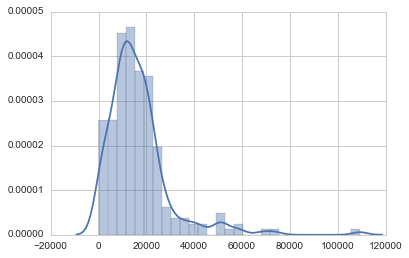

In [60]:
sel_state = 'E08'
pat_class = 2
gr = df[(df.STATE == sel_state) & (df.PAT_CLASS == pat_class)].groupby('ID')['TIME']
state_sim_los = np.array(gr.max() - gr.min())
# sns.distplot(state_sim_los)
f = open('d:\\Src\\health-des\\data\\acs\\Distr_states_' +str(pat_class) + '\\' + sel_state + '.txt')
f.readline()
s = f.readline()
f.close()
state_los = np.array([float(ss) for ss in s[1:-2].split(', ')])
sns.distplot(state_los[(state_los < 3*30*24*60) & (state_los > 0)])
# pp = np.arange(0, 101, 1)
# plt.plot(np.percentile(state_sim_los, pp), np.percentile(state_los, pp), 'o')
# plt.xlim((0, 200))
# plt.ylim((0, 200))

In [59]:
max(state_los), np.percentile(state_los[state_los > 0], 95)

(2096591.0, 226393.0)